## Chapter 11 Working with Alignment Data
We study SAM and BAM for two reasons. First, a huge part of bioinformatics work is manipulating alignment files.    
Second, the skills developed through learning to work with SAM/BAM files are extensible and more widely applicable than to these specific formats.     
**CRAM** format looks pretty good.

In [1]:
# read first 10 rows fo a sam file to get the meta info
! head -n 10 celegans.sam

@SQ	SN:I	LN:15072434
@SQ	SN:II	LN:15279421
@SQ	SN:III	LN:13783801
@SQ	SN:IV	LN:17493829
@SQ	SN:MtDNA	LN:13794
@SQ	SN:V	LN:20924180
@SQ	SN:X	LN:17718942
@RG	ID:VB00023_L001	SM:celegans-01
@PG	ID:bwa	PN:bwa	VN:0.7.10-r789	CL:bwa mem -R @RG\tID:VB00023_L001\tSM:celegans-01 Caenorhabditis_elegans.WBcel235.dna.toplevel.fa celegans-1.fq celegans-2.fq
I_2011868_2012306_0:0:0_0:0:0_2489	83	I	2012257	40	50M	=	2011868	-439	CAAAAAATTTTGAAAAAAAAAATTGAATAAAAATTCACGGATTTCTGGCT	22222222222222222222222222222222222222222222222222	NM:i:0	MD:Z:50	AS:i:50	XS:i:50	RG:Z:VB00023_L001	XA:Z:I,-2021713,50M,0;


'''Header lines contain vital metadata about the reference sequences, 
read and sample information, and (optionally) processing steps and comments. 
Each header line begins with an @, followed by a two-letter code that distinguishes 
the different type of metadata records in the header. Following this two-letter code are 
tab-delimited key- value pairs in the format 
KEY:VALUE (the SAM format specification names these tags and values). 
The celegans.sam file contains the most common header records types you’ll encounter in SAM/BAM files.
'''

In [2]:
# correct way to read the header of a sam file
! samtools view -H celegans.sam

@SQ	SN:I	LN:15072434
@SQ	SN:II	LN:15279421
@SQ	SN:III	LN:13783801
@SQ	SN:IV	LN:17493829
@SQ	SN:MtDNA	LN:13794
@SQ	SN:V	LN:20924180
@SQ	SN:X	LN:17718942
@RG	ID:VB00023_L001	SM:celegans-01
@PG	ID:bwa	PN:bwa	VN:0.7.10-r789	CL:bwa mem -R @RG\tID:VB00023_L001\tSM:celegans-01 Caenorhabditis_elegans.WBcel235.dna.toplevel.fa celegans-1.fq celegans-2.fq


In [3]:
# correct way to read the header of a bam file
! samtools view -H celegans.bam

@SQ	SN:I	LN:15072434
@SQ	SN:II	LN:15279421
@SQ	SN:III	LN:13783801
@SQ	SN:IV	LN:17493829
@SQ	SN:MtDNA	LN:13794
@SQ	SN:V	LN:20924180
@SQ	SN:X	LN:17718942
@RG	ID:VB00023_L001	SM:celegans-01
@PG	ID:bwa	PN:bwa	VN:0.7.10-r789	CL:bwa mem -R @RG\tID:VB00023_L001\tSM:celegans-01 Caenorhabditis_elegans.WBcel235.dna.toplevel.fa celegans-1.fq celegans-2.fq


In [4]:
# go through an alignment entry’s fields, notice here to break the line apart for demonstartion
! samtools view celegans.sam | tr '\t' '\n' | head -n 11

I_2011868_2012306_0:0:0_0:0:0_2489
83
I
2012257
40
50M
=
2011868
-439
CAAAAAATTTTGAAAAAAAAAATTGAATAAAAATTCACGGATTTCTGGCT
22222222222222222222222222222222222222222222222222


In [5]:
# bitwise flags and what they are
! samtools flags


About: Convert between textual and numeric flag representation
Usage: samtools flags INT|STR[,...]

Flags:
	0x1	PAIRED        .. paired-end (or multiple-segment) sequencing technology
	0x2	PROPER_PAIR   .. each segment properly aligned according to the aligner
	0x4	UNMAP         .. segment unmapped
	0x8	MUNMAP        .. next segment in the template unmapped
	0x10	REVERSE       .. SEQ is reverse complemented
	0x20	MREVERSE      .. SEQ of the next segment in the template is reversed
	0x40	READ1         .. the first segment in the template
	0x80	READ2         .. the last segment in the template
	0x100	SECONDARY     .. secondary alignment
	0x200	QCFAIL        .. not passing quality controls
	0x400	DUP           .. PCR or optical duplicate
	0x800	SUPPLEMENTARY .. supplementary alignment



In [6]:
# convert between sam and bam files
# it seems like there is something wrong with the header
#! samtools view -b celegans.sam > celegans_copy.bam
#! samtools view celegans.bam > celegans_copy.sam

In [7]:
! samtools sort celegans_unsorted.bam -o celegans_sorted
# specify the RAM (-m) and treads (-@)
# samtools sort -m 4G -@ 2 celegans_unsorted.bam -o celegans_sorted

In [8]:
# extract specific regions of an alignment with samtools view
# a subset of the 1000 HGP
# first step, index it
! samtools index NA12891_CEU_sample.bam

## samtools view

In [9]:
# check out the first few alignments in the region chromosoem 1 (215906469-215906652)
! samtools view NA12891_CEU_sample.bam 1:215906469-215906652 | head -n 3

SRR003212.5855757	147	1	215906433	60	33S43M	=	215906402	-74	CTACAGTCCTGCAGGGCGTACAGAAAGCATGATGCTGGCATCTGCTTATGAGAGACTCAGGAAGCTTACAATTATG	")$+5$$/0:86%98$0%8A<G4BE$:<==>8;=:?C;1B9>A;:@<@3=A?A?;<7=A?=@A=<>>>>@@>5?A;	XC:i:43	XT:A:U	NM:i:1	SM:i:37	AM:i:37	X0:i:1	X1:i:0	XM:i:1	XO:i:0	XG:i:0	MD:Z:38C4	RG:Z:SRR003212	OQ:Z:,*$2)$$+0+)0%''$:%)+61&@2$*5+-+)+,>25,+80IF-F>7I).I3IB-I2II?IIIIIAIIIIG;/6A?
SRR003206.18432241	163	1	215906434	60	43M8S	=	215906468	82	CTGGCATCTGCTTATGAGAGACTCAGGAAGCTTACAATTATGATGGAAGGG	<A=:;=>=@==>>=>=<=<=<=A?<=81?=1@?<47:?>5=<%<97%%9/$	XC:i:43	XT:A:U	NM:i:1	SM:i:37	AM:i:37	X0:i:1	X1:i:0	XM:i:1	XO:i:0	XG:i:0	MD:Z:37C5	RG:Z:SRR003206	OQ:Z:IIIIII=IIIB1I@II8I?I9172+IG&<I&,I-&(-9?*4;%208%%:*$
SRR014595.5642583	16	1	215906435	37	8S43M	*	0	0	NNNNNNNNNGGCATCTGCTTATGAGAGACTCAGGAAGCTTACAATTATGAT	!!!!!!!!!7;7;<8?>2B@>A?BABB?A?ADAA>C?@B>>@<=@=<>><<	XC:i:43	XT:A:U	NM:i:2	X0:i:1	X1:i:0	XM:i:2	XO:i:0	XG:i:0	MD:Z:0T35C6	RG:Z:SRR014595	OQ:Z:!!!!!!!!!2I1II=II)IIIIIIIIIIIIIIIIIIIIIIIIIIIII

In [11]:
# write these alignments in BAM format onto disk
! samtools view -b NA12891_CEU_sample.bam 1:215906469-215906652 > USH2A_sample_alns.bam

In [19]:
# usng samtools view to extract regions from a BED file (with -L)
# seems like there is an issue with jupyter notebook here: Broken pipe, but no issue on terminal
! samtools view -L USH2A_exons.bed NA12891_CEU_sample.bam | head -n 3

SRR003214.11652876	163	1	215796180	60	76M	=	215796224	92	CAGAGCTGTTAAGAGTATTATTTTTTAATAATAAATAGATGATTAAGCCAGAATTAGGTCACATTCAAATATTTAT	<>=<=?A==@8<<:<::?@8?A@A@A3=@>=B5>;B;;8B>9CC=<:C>@;>2DC978>B>@=@A=;887.141)-	XT:A:U	NM:i:0	SM:i:37	AM:i:37	X0:i:1	X1:i:0	XM:i:0	XO:i:0	XG:i:0	MD:Z:76	RG:Z:SRR003214	OQ:Z:I6IEIIII5I48I=I-9>E28EIAID+5I=3F+3/C1H-6H.E12,C8+2G6&70*7A(.:./54/,*)=)44-,<
SRR010927.6484300	163	1	215796188	60	51M	=	215796213	76	TTAAGAGTATTATTTTTTAATAATAAATAGATGATTAAGCCAGAATTAGGT	;?=?===>>?@>@@AAAA?A@?A@?AA@>>=?>=?@=?=;=><;=<<7554	XT:A:U	NM:i:0	SM:i:37	AM:i:37	X0:i:1	X1:i:0	XM:i:0	XO:i:0	XG:i:0	MD:Z:51	RG:Z:SRR010927	OQ:Z:IIIIIIIIIIIIIIIIIIIIIIIIIIIII2IIIIIIII:EII7IIII;)3G
SRR005667.2049283	163	1	215796190	60	51M	=	215796340	201	AAGAGTATTATTTTTTAATAATAAATAGATGATTAAGCCAGAATTAGGTCA	:?<<<;<<======>>>?>>@>>@@>?>>>?>>??@???@??A???>7<>:	XT:A:U	NM:i:0	SM:i:37	AM:i:37	X0:i:1	X1:i:0	XM:i:0	XO:i:0	XG:i:0	MD:Z:51	RG:Z:SRR005667	OQ:Z:IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIE7I9=
samtools

In [20]:
# -f for flags need
! samtools view -f 4 NA12891_CEU_sample.bam | head -n 3

SRR003208.1496374	69	1	215623168	0	35M16S	=	215623168	0	TTTGTAGGTCCAAAAAAAGAGAGGGANGAAGTGCTCCGTATAATCATAGTA	>@>=<5<;#>>:28-813;$<.;$0/!:%%<%9$3%3.41"#"$0$/"%%#	XC:i:35	RG:Z:SRR003208	OQ:Z:=D@B6-EC#=:.)+&+'(2$4&4$(&!,%%0%)$&%(*('"#"$&$'"%%#
SRR002141.16953736	181	1	215623191	0	40M11S	=	215623191	0	AATATCCACTACACCAACCATAAACTTAATTGTCTCTATTTTTTTTCCTGT	$$7;$%<<$$>%<9?B>:@B;@<??><???>:4=02@%?;>%?==<)A@,<	XC:i:40	RG:Z:SRR002141	OQ:Z:$$(+$%).$$,%6+II+EII+<,2C.04D51,*>()I%:0:%CI6<&AF&8
SRR002143.2512308	181	1	215623216	0	*	=	215623216	0	GTTCACAAATAACAGTATATTTATAACAACCATAAACTTAATTGGCACTAT	+4$"$#"$"$#$#%4041"%244"<1>A::9?=A@8=/<A>6==;24<;?;	RG:Z:SRR002143	OQ:Z:I&$"$#"$"$#$#%&&&&"%&('"+&85+4-29<7+B'5H4,765++<756
samtools view: writing to standard output failed: Broken pipe
samtools view: error closing standard output: -1


In [21]:
! samtools flags unmap

0x4	4	UNMAP


In [22]:
! samtools flags 69

0x45	69	PAIRED,UNMAP,READ1


In [23]:
! samtools flags READ1,PROPER_PAIR

0x42	66	PROPER_PAIR,READ1


In [26]:
! samtools view -f 66 NA12891_CEU_sample.bam | head -n 3

SRR005672.8895	99	1	215622850	60	51M	=	215623041	227	GGAATAAATATAGGAAATGTATAATATATAGGAAATATATATATATAGTAA	;=<>=<><9<=<9:<=?><=>?>@?>>9>>>=>@A@?@?@??7??==:19;	XT:A:U	NM:i:1	SM:i:37	AM:i:37	X0:i:1	X1:i:0	XM:i:1	XO:i:0	XG:i:0	MD:Z:48G2	RG:Z:SRR005672	OQ:Z:IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII?114I
SRR005674.4317449	99	1	215622863	37	51M	=	215622987	175	GAAATGTATAATATATAGGAAATATATATATATAGGAAATATATAATATAT	;=>>=<;<=<>=:>=:==<<@@?:>?<?;>>>?>;44@@?>?>>>/:>;=9	XT:A:U	NM:i:0	SM:i:37	AM:i:37	X0:i:1	X1:i:0	XM:i:0	XO:i:0	XG:i:0	MD:Z:51	RG:Z:SRR005674	OQ:Z:IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII<2+IIIIIIII&GIICI
SRR010927.10846964	83	1	215622892	60	51M	=	215622860	-83	ATATAGAAAATATATAATATATGTTAGGAATATATTAAGGCACCAGCTGTG	9596?$$===<>=>;>?<?;??4?=@34>=<=;??;?@?===:=?=<==@?	XT:A:U	NM:i:1	SM:i:37	AM:i:37	X0:i:1	X1:i:0	XM:i:1	XO:i:0	XG:i:0	MD:Z:6G44	RG:Z:SRR010927	OQ:Z:G,I.F$$III=ICI7IICI8II-IEI-/IIIIIIGBIIIIIIIIIIIIIII
samtools view: writing to standard output failed: Broken pipe
samtools view: error 

In [27]:
# use -F to de-select the flags
! samtools view -F 66 NA12891_CEU_sample.bam | head -n 3

SRR005675.5348609	0	1	215622863	37	51M	*	0	0	GAAATGTATAATATATAGGAAATATATATATATAGGAAATATATAATATAT	9>AB>@>@@AD@A@AAAB?CEEACBB;CBB@;><@;@?A>?);*;>.<2:&	XT:A:U	NM:i:0	X0:i:1	X1:i:0	XM:i:0	XO:i:0	XG:i:0	MD:Z:51	RG:Z:SRR005675	OQ:Z:IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIEFIIIII3C18H:BCI5
SRR002133.11695147	0	1	215622876	37	48M	*	0	0	TATAGGAAATATATATATATAGGAAATATATAATATATGTTAGGTATA	??@AA?ADDBCBCCCCCCCBB=9=CD>CCBAAA>=@=>%;969"%455	XT:A:U	NM:i:1	X0:i:1	X1:i:0	XM:i:1	XO:i:0	XG:i:0	MD:Z:44A3	RG:Z:SRR002133	OQ:Z:IIIIIIGGHIIIIIII?C:E@-+.350:<352/0.5/3%-/)*"%+06
SRR002129.2750778	0	1	215622902	37	35M1S	*	0	0	TATATAATATATGTTAGGAATATATTAAGGCACCAG	=:@@@A<><B>B=%D>9>7=0BC@B?1@672@>873	XC:i:35	XT:A:U	NM:i:0	X0:i:1	X1:i:0	XM:i:0	XO:i:0	XG:i:0	MD:Z:35	RG:Z:SRR002129	OQ:Z:I;IIII2<6I8F?%I1.I*+);I5I3&-*-*16+'*
samtools view: writing to standard output failed: Broken pipe
samtools view: error closing standard output: -1


In [31]:
# combination of bit flags
! samtools flags paired
! samtools flags unmap,proper_pair
! samtools view -F 6 -f 1 NA12891_CEU_sample.bam | head -n 3

0x1	1	PAIRED
0x6	6	PROPER_PAIR,UNMAP
SRR003208.1496374	137	1	215623168	0	35M16S	=	215623168	0	AAATAGTGCCAATTACGTTTATGGTTGTTATAATGATACTGTTTGTTCTTT	;/,>);5<;<2+?=,%34??.<<97@<#."5$4%#"#""2%%%"#%+"$$"	XC:i:35	XT:A:R	NM:i:1	SM:i:0	AM:i:0	X0:i:2	X1:i:0	XM:i:1	XO:i:0	XG:i:0	MD:Z:15A19	RG:Z:SRR003208	OQ:Z:7('@&?,84I(&42&%0(55&,.3(4-#&"'$&%#"#""&%%%"#%&"$$"
ERR002297.5178166	177	1	215623174	0	36M	=	215582813	-40361	TGCCAATTAAGTTTATGGTTGTTATAATGATACTGT	4:*?4,1;?6:/<0?@==@@=@>@>@?@>@>??A>=	XT:A:R	NM:i:0	SM:i:0	AM:i:0	X0:i:2	X1:i:0	XM:i:0	XO:i:0	XG:i:0	MD:Z:36	RG:Z:ERR002297	OQ:Z:3<4<74.<>-<6</>>>>>>>>>>>>>>>>>>>>>>
SRR002141.16953736	121	1	215623191	0	7S44M	=	215623191	0	GTTTATTGTTGTTATAATGATACTGTTGGTGCTGAACACATGTTTACTAAC	"55%50%%::.<9?<@@=>A=>;?4<=><>=;>.B@>@?C?:==?@=?BA?	XC:i:44	XT:A:R	NM:i:0	SM:i:0	AM:i:0	X0:i:2	X1:i:0	XM:i:0	XO:i:0	XG:i:0	MD:Z:44	RG:Z:SRR002141	OQ:Z:"2/%,(%%:7&:EI:II=+IGIID'II2-I4II&IIIIIII0IIIIIIIII
samtools view: writing to standard output failed: Broken pipe
samtools view

In [33]:
# verify the approach in the cell above
! samtools view -F 6 NA12891_CEU_sample.bam | wc -l # total mapped and paired
! samtools view -F 7 NA12891_CEU_sample.bam | wc -l # total mapped, paired and proper mapped
! samtools view -F 6 -f 1 NA12891_CEU_sample.bam | wc -l # total mapped, paired and not proper paired

  233628
  201101
   32527


In [39]:
# check if it is right
233628 - 201101 == 32527
# yes, it is right.

True

## samtools tview

In [ ]:
# samtools tview could give a quick way to inspect a few alignments
# ! samtools tview NA12891_CEU_sample.bam human_g1k_v37.fasta

In [ ]:
# since NA12891_CEU_sample.bam is only a subset of the reads
# ! samtools tview -p 1:215906469-215906652 NA12891_CEU_sample.bam human_g1k_v37.fasta

## IGV to visualize alignments

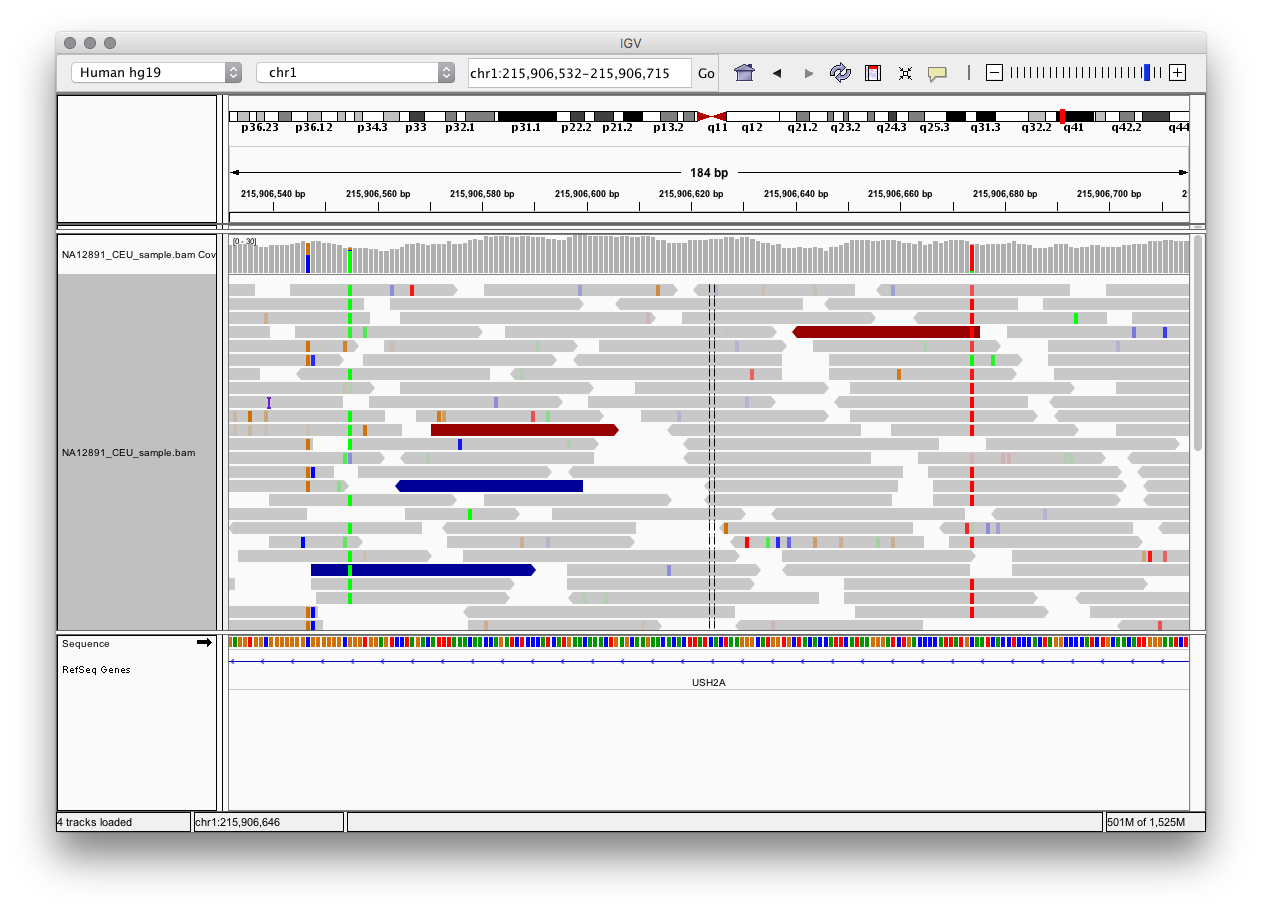

In [3]:
# The most basic GUI of IGV
from IPython.display import Image, display
display(Image(filename='igv_1.png'))

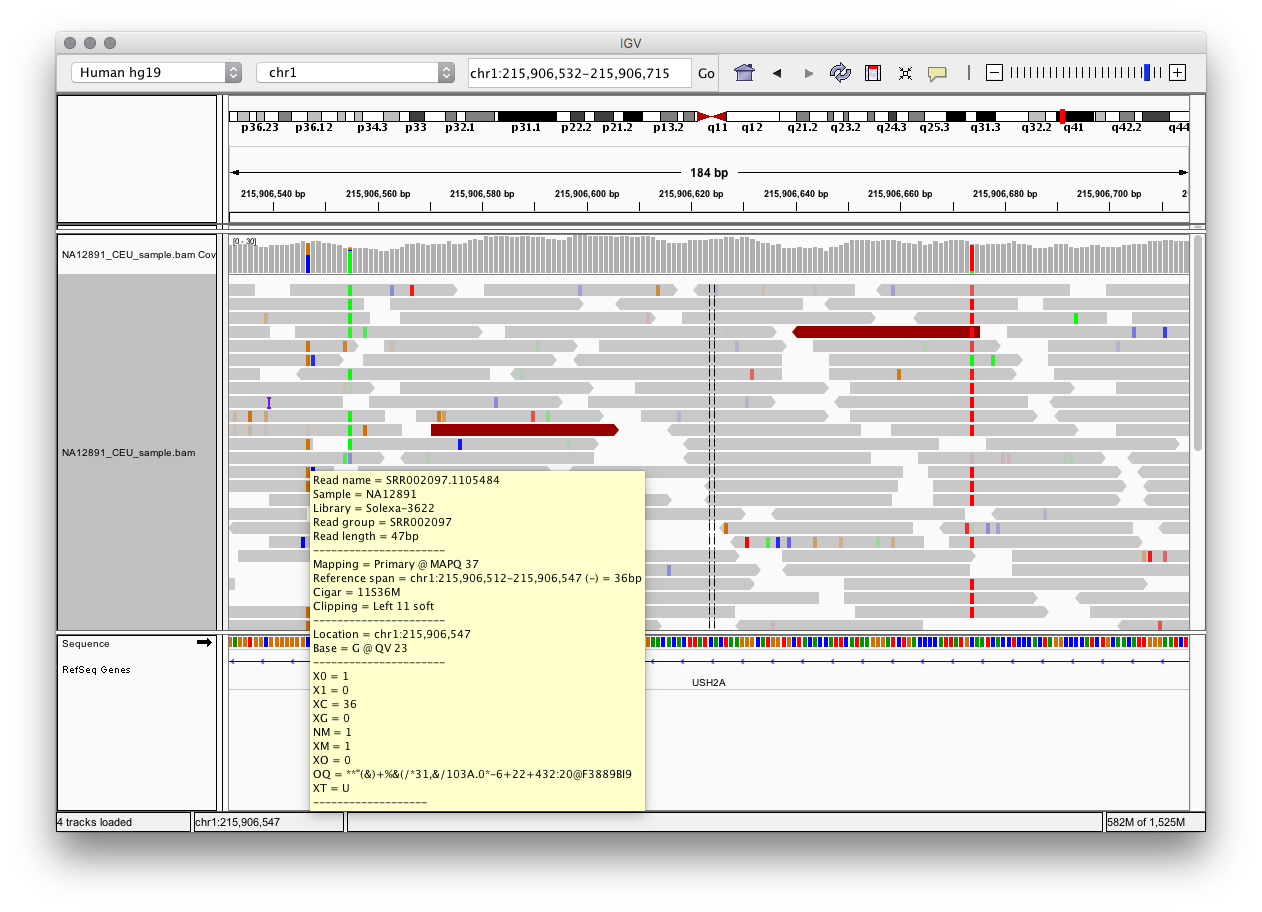

In [4]:
# hover to show features including the base qualities of mismatches and the alignment’s mapping quality
display(Image(filename='igv_2.png'))

## Pileups with samtools pileup, variant calling, and base alignment quality

In [4]:
# 'vanilla' samtools variant calling pipeline
# input: BAM file
# reference genome in FASTA through -f
# specific region --region or -r
# disable Base Alignment Quality --no-BAQ or -B

! samtools mpileup --no-BAQ --region 1:215906528-215906567 \
    --fasta-ref human_g1k_v37.fasta NA12891_CEU_sample.bam

[mpileup] 1 samples in 1 input files
<mpileup> Set max per-file depth to 8000
1	215906528	G	21	,,,,,,,,.,,,.,,..,.,,	;=?./:?>>;=7?>>@A?==:
1	215906529	A	18	,,,,,,,,.,,,,,..,.	D>AA:@A>9>?;;?>>@=
1	215906530	G	21	,$,,,,,,,.,,.,,..,.,,,	<=?>/;?=><7?>>@B>=6>5
1	215906531	A	18	,,$,,$,,,.,,,.,,..,.	>?A7@A?:>@6:@?>B@=
1	215906532	G	20	,,$,,,.,,,.,,..,.,,,^F.	=?;?><<=;?>>?B?>?=1;
1	215906533	A	17	,,,,.,,,.,,..,..^],	>@A@;?@2:@?7B<8>7
1	215906534	G	19	,,,,.,,.,,..,.,,,,^].	=9?<>;;?>=@B>>??13>
1	215906535	G	21	,,,,.,,,.,,..,.,,,.,.	;6>;<6:93=<<9==3?2:=?
1	215906536	T	17	,,,$,.,,,,..,.g.,.	?>?=7;@;??07:7;7?
1	215906537	G	19	,$,,.,,.,,..,.,,,.,.	::=?;;5>=@D>?>?4>>@
1	215906538	G	19	,,.,,,.,,..,.,,,.,.	::7:<5>><<?==>?2:<?
1	215906539	C	14	,,$.,,,+1g,,....,.	6;244.76>15:6:
1	215906540	G	20	,.,,,.,,..,.,,,.,.^:.^F.	:5<:88>=89>8>?:5=8;9
1	215906541	G	20	,.,,,.,,..,.,,,.,...	99<:7;>=3?>=>?3:>?9A
1	215906542	G	20	,.,,,.,,..,.,,,.,...	:7<:=?>=8<>=>>29=:9A
1	215906543	G	19	,.,,,,,..,.,,,.,...	:;<9:>=<?>=>

In [20]:
# calling variants and export into a vcf.gz file for analysis
# notice here we are using --no-BAQ, which is not recommended

! samtools mpileup -v --no-BAQ --region 1:215906528-215906567 --fasta-ref \
    human_g1k_v37.fasta NA12891_CEU_sample.bam \
    > NA12891_CEU_sample.vcf.gz

[mpileup] 1 samples in 1 input files
<mpileup> Set max per-file depth to 8000


In [28]:
# check the output variant calls
# zgrep -v to remove the header
! zgrep -v "^##" NA12891_CEU_sample.vcf.gz | \
awk 'BEGIN{OFS="\t"} {split($8, a, ";"); print $1,$2,$4,$5,$6,a[1],$9,$10}'
# awk here to select specific columns
# I love awk

#CHROM	POS	REF	ALT	QUAL	INFO	FORMAT	NA12891
1	215906528	G	<*>	0	DP=21	PL	0,63,236
1	215906529	A	<*>	0	DP=22	PL	0,54,251
1	215906530	G	<*>	0	DP=22	PL	0,63,236
1	215906531	A	<*>	0	DP=21	PL	0,54,252
1	215906532	G	<*>	0	DP=20	PL	0,60,252
1	215906533	A	<*>	0	DP=20	PL	0,51,246
1	215906534	G	<*>	0	DP=21	PL	0,57,244
1	215906535	G	<*>	0	DP=21	PL	0,63,238
1	215906536	T	G,<*>	0	DP=21	PL	0,29,219,48,222,229
1	215906537	G	<*>	0	DP=20	PL	0,57,252
1	215906538	G	<*>	0	DP=19	PL	0,57,241
1	215906539	C	<*>	0	DP=19	PL	0,42,176
1	215906539	CGGGGGGG	CGGGGGGGG	0	INDEL	PL	30,0,20
1	215906540	G	<*>	0	DP=20	PL	0,60,247
1	215906541	G	<*>	0	DP=20	PL	0,60,252
1	215906542	G	<*>	0	DP=20	PL	0,60,255
1	215906543	G	<*>	0	DP=20	PL	0,57,251
1	215906544	G	<*>	0	DP=21	PL	0,63,249
1	215906545	G	<*>	0	DP=22	PL	0,63,255
1	215906546	G	C,<*>	0	DP=23	PL	0,49,239,66,242,246
1	215906547	C	G,<*>	0	DP=22	PL	123,0,103,144,127,233
1	215906548	G	C,<*>	0	DP=22	PL	23,0,163,68,175,207
1	215906549	G	<*>	0	DP=22	PL	0,66,248
1	215906550	G	<*

In [30]:
# bcftools call run with -m uses the multiallelic caller. 
# -v option only outputs variant sites
! bcftools call -v -m NA12891_CEU_sample.vcf.gz > NA12891_CEU_sample_calls.vcf.gz

Note: Neither --ploidy nor --ploidy-file given, assuming all sites are diploid


In [32]:
# check the variants callings using bcftools calls
! zgrep -v "^##" NA12891_CEU_sample_calls.vcf.gz | \
awk 'BEGIN{OFS="\t"} {split($8, a, ";"); print $1,$2,$4,$5,$6,a[1],$9,$10}'

#CHROM	POS	REF	ALT	QUAL	INFO	FORMAT	NA12891
1	215906547	C	G	90	DP=22	GT:PL	0/1:123,0,103
1	215906555	G	A	157	DP=19	GT:PL	1/1:184,7,0


In [33]:
! bcftools call -m NA12891_CEU_sample.vcf.gz | grep -v "^##" | \
awk 'BEGIN{OFS="\t"} {split($8, a, ";"); print $1,$2,$4,$5,$6,a[1],$9,$10}'

Note: Neither --ploidy nor --ploidy-file given, assuming all sites are diploid
#CHROM	POS	REF	ALT	QUAL	INFO	FORMAT	NA12891
1	215906528	G	.	999	DP=21	GT	0/0
1	215906529	A	.	999	DP=22	GT	0/0
1	215906530	G	.	999	DP=22	GT	0/0
1	215906531	A	.	999	DP=21	GT	0/0
1	215906532	G	.	999	DP=20	GT	0/0
1	215906533	A	.	999	DP=20	GT	0/0
1	215906534	G	.	999	DP=21	GT	0/0
1	215906535	G	.	999	DP=21	GT	0/0
1	215906536	T	.	30.0316	DP=21	GT	0/0
1	215906537	G	.	999	DP=20	GT	0/0
1	215906538	G	.	999	DP=19	GT	0/0
1	215906539	C	.	999	DP=19	GT	0/0
1	215906539	CGGGGGGG	.	4.48164	INDEL	GT	0/0
1	215906540	G	.	999	DP=20	GT	0/0
1	215906541	G	.	999	DP=20	GT	0/0
1	215906542	G	.	999	DP=20	GT	0/0
1	215906543	G	.	999	DP=20	GT	0/0
1	215906544	G	.	999	DP=21	GT	0/0
1	215906545	G	.	999	DP=22	GT	0/0
1	215906546	G	.	29.9006	DP=23	GT	0/0
1	215906547	C	G	90	DP=22	GT:PL	0/1:123,0,103
1	215906548	G	.	11.796	DP=22	GT	0/0
1	215906549	G	.	999	DP=22	GT	0/0
1	215906550	G	.	999	DP=22	GT	0/0
1	215906551	G	.	999	DP=22	GT	0/0
1	215906552	G	.	99

In [34]:
! grep "FORMAT=<ID=GT" NA12891_CEU_sample_calls.vcf.gz

##FORMAT=<ID=GT,Number=1,Type=String,Description="Genotype">


In [35]:
! grep "FORMAT=<ID=PL" NA12891_CEU_sample_calls.vcf.gz

##FORMAT=<ID=PL,Number=G,Type=Integer,Description="List of Phred-scaled genotype likelihoods">


In [36]:
# samtools mpileup enables Base Alignment Quality (BAQ), \
# which uses uses a Hidden Markov Model to adjust base qualities \
# to reflect not only the probability of an incorrect base call, 
# but also of a particular base being misaligned
! samtools mpileup -u -v --region 1:215906528-215906567 \
    --fasta-ref human_g1k_v37.fasta NA12891_CEU_sample.bam > \
    NA12891_CEU_sample_baq.vcf.gz

[mpileup] 1 samples in 1 input files
<mpileup> Set max per-file depth to 8000


In [37]:
# both sites 215,906,547 and 215,906,548 are now not considered as possible variant sites\
# the BAQ algorithm has downweighted the bases around the low complexity region

! grep -v "^##" NA12891_CEU_sample_baq.vcf.gz | \
awk 'BEGIN{OFS="\t"} {split($8, a, ";"); print $1,$2,$4,$5,$6,a[1],$9,$10}'

#CHROM	POS	REF	ALT	QUAL	INFO	FORMAT	NA12891
1	215906528	G	<*>	0	DP=21	PL	0,63,236
1	215906529	A	<*>	0	DP=22	PL	0,54,249
1	215906530	G	<*>	0	DP=22	PL	0,63,236
1	215906531	A	<*>	0	DP=21	PL	0,54,252
1	215906532	G	<*>	0	DP=20	PL	0,60,252
1	215906533	A	<*>	0	DP=20	PL	0,51,246
1	215906534	G	<*>	0	DP=21	PL	0,57,244
1	215906535	G	<*>	0	DP=21	PL	0,63,238
1	215906536	T	G,<*>	0	DP=21	PL	0,29,219,48,222,229
1	215906537	G	<*>	0	DP=20	PL	0,57,252
1	215906538	G	<*>	0	DP=19	PL	0,57,241
1	215906539	C	<*>	0	DP=19	PL	0,42,176
1	215906539	CGGGGGGG	CGGGGGGGG	0	INDEL	PL	30,0,20
1	215906540	G	<*>	0	DP=20	PL	0,42,203
1	215906541	G	<*>	0	DP=20	PL	0,39,207
1	215906542	G	<*>	0	DP=20	PL	0,36,197
1	215906543	G	<*>	0	DP=20	PL	0,36,202
1	215906544	G	<*>	0	DP=21	PL	0,39,208
1	215906545	G	<*>	0	DP=22	PL	0,39,215
1	215906546	G	<*>	0	DP=23	PL	0,42,216
1	215906547	C	<*>	0	DP=22	PL	0,21,141
1	215906548	G	<*>	0	DP=22	PL	0,42,200
1	215906549	G	<*>	0	DP=22	PL	0,45,221
1	215906550	G	<*>	0	DP=22	PL	0,48,228
1	215906551	G	<*>	0